In [164]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

## Data exploration

In [119]:
ozone_df = pd.read_csv('../data/raw/ozone.csv')
ozone_df.tail(10)

,Date,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude
54749,02/25/2024,AQS,60254003,1,NaN,ppm,42.0,Westmorland,17,100.0,87.0,20940.0,"El Centro, CA",25,Imperial,33.032500,-115.623610
54750,06/18/2024,AQS,60658001,1,0.066,ppm,87.0,Rubidoux,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",65,Riverside,33.999580,-117.416010
54751,05/20/2024,AQS,60190500,1,0.061,ppm,71.0,Table Mountain Air Monitoring Site,17,100.0,87.0,23420.0,"Fresno, CA",19,Fresno,36.985119,-119.658339
54752,08/15/2024,AQS,60430006,1,0.036,ppm,33.0,Jerseydale,17,100.0,87.0,NaN,NaN,43,Mariposa,37.543770,-119.839570
54753,11/27/2024,AQS,60371701,1,0.023,ppm,21.0,Pomona,17,100.0,87.0,31080.0,"Los Angeles-Long Beach-Anaheim, CA",37,Los Angeles,34.067030,-117.751400
54754,02/16/2024,AQS,60710005,1,0.044,ppm,41.0,Crestline,17,100.0,87.0,40140.0,"Riverside-San Bernardino-Ontario, CA",71,San Bernardino,34.243100,-117.272350
54755,August 14/2024,AQS,60270101,1,0.057,ppm,58.0,Death Valley NP - Park Village,17,100.0,87.0,13860.0,"Bishop, CA",27,Inyo,36.508611,-116.847778
54756,June 30/2024,AQS,60690002,1,NaN,ppm,29.0,Hollister,17,100.0,47.0,41940.0,"San Jose-Sunnyvale-Santa Clara, CA",69,San Benito,36.843425,-121.362100
54757,/2024,AQS,61072010,1,0.058,ppm,61.0,Porterville,17,100.0,199.0,47300.0,"Visalia-Porterville, CA",107,Tulare,36.031831,-119.055018
54758,July 22/2024,AQS,60611004,1,NaN,ppm,45.0,Tahoe City-Fairway Drive,17,100.0,87.0,40900.0,"Sacramento--Roseville--Arden-Arcade, CA",61,Placer,39.166017,-120.148833


In [88]:
ozone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54759 entries, 0 to 54758
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  54759 non-null  object 
 1   Source                                54759 non-null  object 
 2   Site ID                               54759 non-null  int64  
 3   POC                                   54759 non-null  int64  
 4   Daily Max 8-hour Ozone Concentration  52021 non-null  float64
 5   Units                                 54759 non-null  object 
 6   Daily AQI Value                       52021 non-null  float64
 7   Local Site Name                       54759 non-null  object 
 8   Daily Obs Count                       54759 non-null  int64  
 9   Percent Complete                      54759 non-null  float64
 10  Method Code                           48269 non-null  float64
 11  CBSA Code      

__Areas to improve:__
- Datatype mismatches: `Site ID` should probably rather be of type integer. Columns `Units`, `Local Site Name`, `CBSA Name`, and `County` should rather be strings, most likely.
- Missing data in: `Daily Max 8-hour Ozone Concentration`, `Method Code`, `CBSA Code`, `CBSA Name`.

I would also like to take a look at the `Date` column to see how does the data look like there, if it needs any processing and if there are any inconsistencies.

In [89]:
ozone_df['Date'].unique()

array(['/2024', '01/02/2024', 'January 04/2024', 'January 05/2024',
       'January 06/2024', '01/07/2024', 'January 10/2024',
       'January 11/2024', 'January 12/2024', '01/13/2024', '01/14/2024',
       '01/15/2024', '01/17/2024', '01/18/2024', '01/19/2024',
       '01/21/2024', '01/23/2024', '01/24/2024', '01/30/2024',
       '01/01/2024', 'January 02/2024', '01/03/2024', '01/04/2024',
       '01/06/2024', 'January 08/2024', '01/10/2024', '01/12/2024',
       '01/16/2024', 'January 18/2024', 'January 20/2024',
       'January 21/2024', '01/25/2024', 'January 26/2024', '01/27/2024',
       '01/29/2024', '01/31/2024', '02/02/2024', 'February 03/2024',
       '02/04/2024', '02/05/2024', '02/06/2024', '02/07/2024',
       '02/09/2024', '02/10/2024', '02/11/2024', '02/12/2024',
       '02/14/2024', 'February 17/2024', '02/18/2024', '02/19/2024',
       '02/20/2024', '02/21/2024', '02/22/2024', 'February 23/2024',
       'February 24/2024', '02/25/2024', '02/26/2024', '02/27/2024',
    

In [90]:
ozone_df['Date']

0                  /2024
1             01/02/2024
2                  /2024
3        January 04/2024
4        January 05/2024
              ...       
54754         02/16/2024
54755     August 14/2024
54756       June 30/2024
54757              /2024
54758       July 22/2024
Name: Date, Length: 54759, dtype: object

The are a bunch of inconsistencies: a lot of dates are written as 'Month dd/YYYY', mm/dd/YYYY, /YYYY,. We'd need to standardize them.

In [91]:
ozone_df['Units'].unique()

array(['ppm'], dtype=object)

In [92]:
ozone_df.describe()

,Site ID,POC,Daily Max 8-hour Ozone Concentration,Daily AQI Value,Daily Obs Count,Percent Complete,Method Code,CBSA Code,County FIPS Code,Site Latitude,Site Longitude,Weekday
count,5.475900e+04,54759.000000,52021.000000,52021.000000,54759.000000,54759.000000,48269.000000,52351.000000,54759.000000,54759.000000,54759.000000,0.0
mean,6.059086e+07,1.000256,0.043519,45.280079,27.534688,99.340346,89.051669,36107.577697,58.918406,36.169550,-119.665107,NaN
std,3.001943e+05,0.015988,0.014610,25.899065,97.800446,3.658452,36.636778,9536.717562,30.012874,2.192841,2.022987,NaN
min,6.001001e+07,1.000000,0.000000,0.000000,1.000000,6.000000,47.000000,12540.000000,1.000000,32.578165,-124.179490,NaN
25%,6.031100e+07,1.000000,0.034000,31.000000,17.000000,100.000000,87.000000,31080.000000,31.000000,34.181977,-121.420838,NaN
50%,6.065500e+07,1.000000,0.041000,38.000000,17.000000,100.000000,87.000000,40140.000000,65.000000,36.209286,-119.828400,NaN
75%,6.081100e+07,1.000000,0.052000,48.000000,17.000000,100.000000,87.000000,41860.000000,81.000000,37.961578,-118.068500,NaN
max,6.113100e+07,2.000000,0.139000,236.000000,1000.000000,100.000000,199.000000,49700.000000,113.000000,41.726892,-114.602090,NaN


Let's take a look at seaborn's `pairplot` to figure out relationships between all possible pairs of columns.

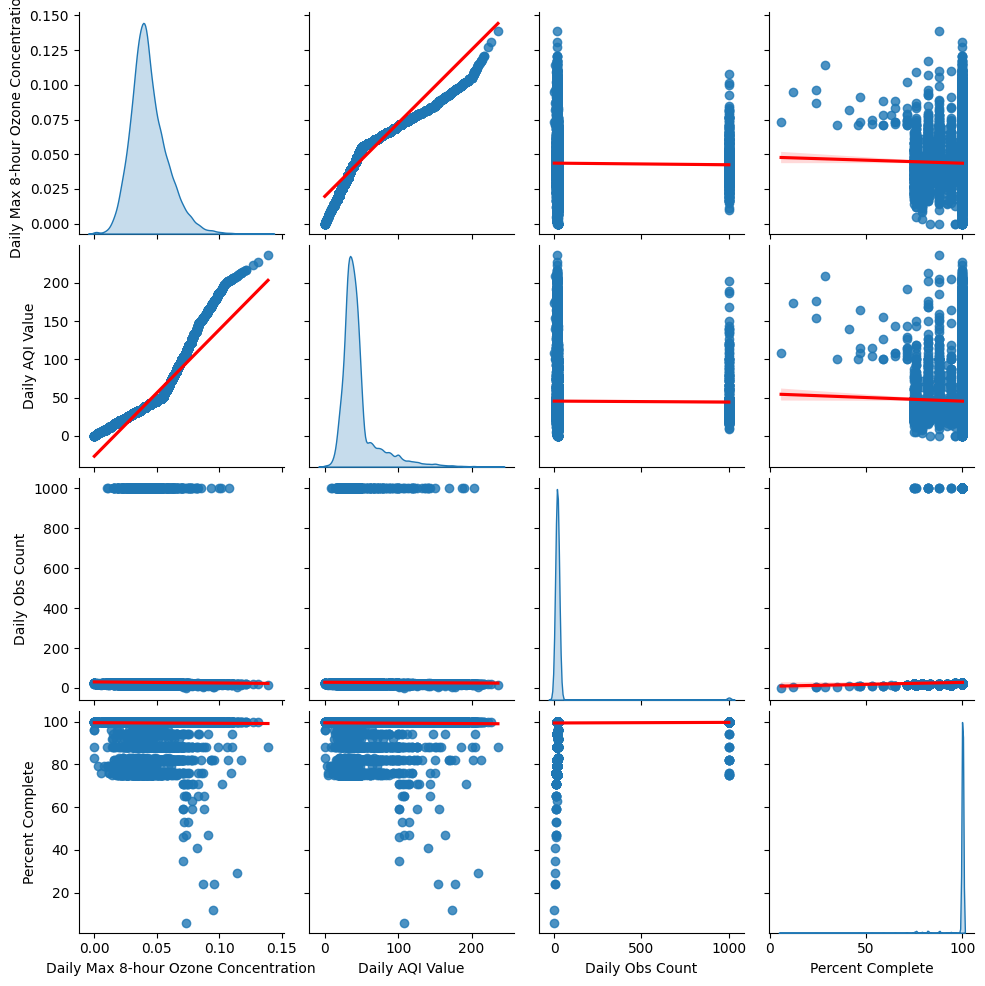

In [93]:
cols_to_plot = ['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete']
sns.pairplot(ozone_df[cols_to_plot],  diag_kind='kde', kind='reg', plot_kws={'line_kws':{'color':'red'}})

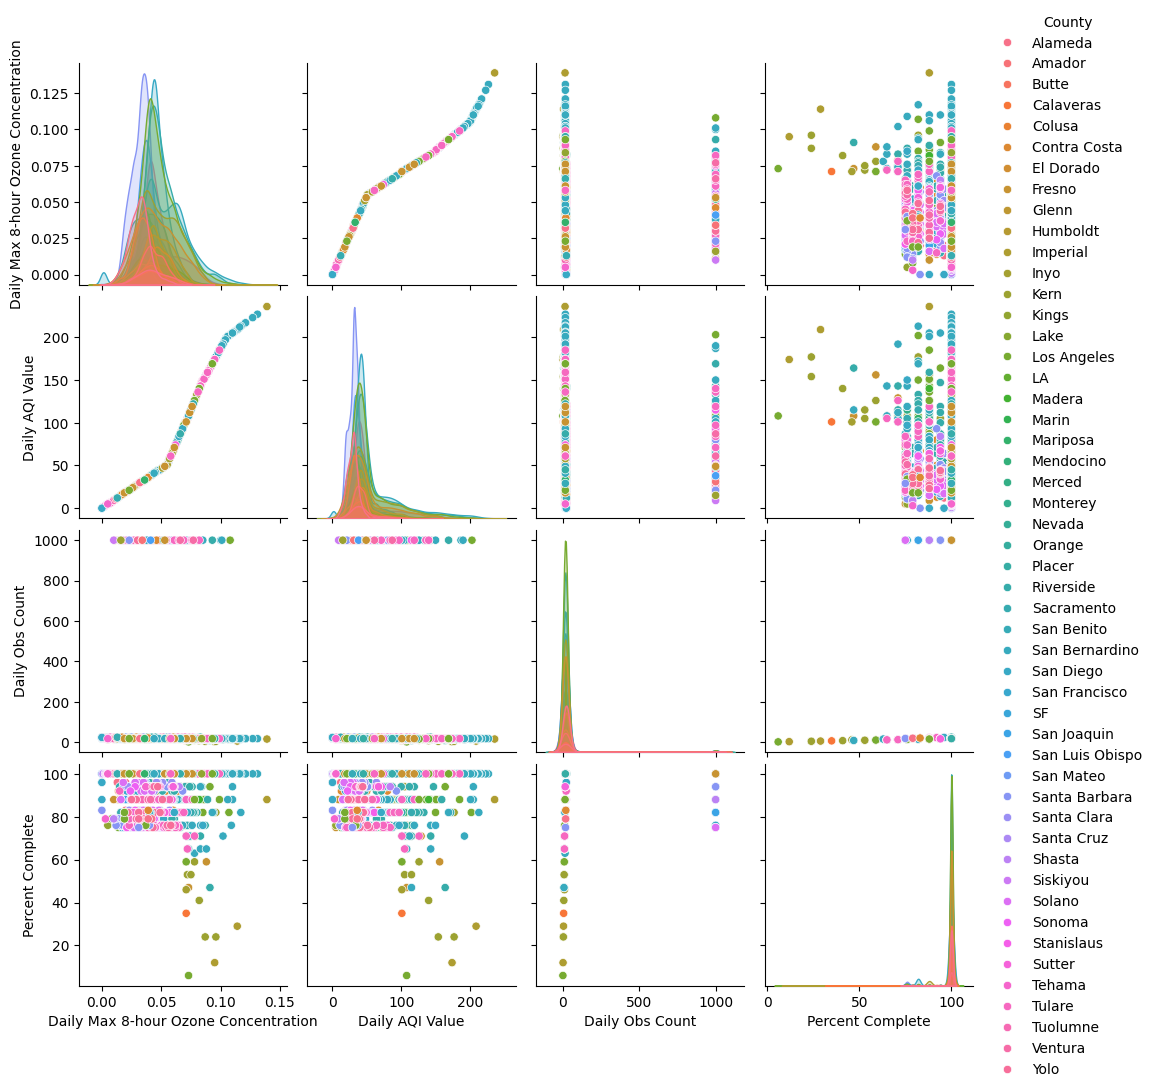

In [94]:
cols_to_plot = ['Daily Max 8-hour Ozone Concentration', 'Daily AQI Value', 'Daily Obs Count', 'Percent Complete', 'County']
sns.pairplot(ozone_df[cols_to_plot],  diag_kind='kde', hue='County')

Obviously, Daily AQI Value and Daily Max 8-hour Ozone Concentration have a clear linear correlation, since AQI is derived from ozone concentration. 
For curiosity, I also wanted to highlight the data by county, but so far it does not provide a lot of valuable insights. 

Let's get straight to data cleaning!

## Data cleaning
I will start with dealing with all the inconsistencies in the `Date` column.

In [120]:
print((ozone_df['Date'] == '/2023').sum())
print((ozone_df['Date'] == '/2024').sum())
print((ozone_df['Date'] == '/2025').sum())

0
9202
0


In [121]:
ozone_df = ozone_df[ozone_df['Date'] != '/2024']

In [122]:
ozone_df['Date_parts'] = ozone_df['Date'].astype(str).str.split(' ')
ozone_df['Date_parts']

1              [01/02/2024]
3        [January, 04/2024]
4        [January, 05/2024]
5        [January, 06/2024]
6              [01/07/2024]
                ...        
54753          [11/27/2024]
54754          [02/16/2024]
54755     [August, 14/2024]
54756       [June, 30/2024]
54758       [July, 22/2024]
Name: Date_parts, Length: 45557, dtype: object

In [123]:
months = {'01': 'January', 
          '02': 'February', 
          '03': 'March', 
          '04': 'April', 
          '05': 'May', 
          '06': 'June', 
          '07': 'July', 
          '08': 'August', 
          '09': 'September', 
          '10': 'October', 
          '11': 'November', 
          '12': 'December'}

In [124]:
for i, bad_date in enumerate(ozone_df['Date_parts']):
    month_str = bad_date[0]
    if month_str in months.values():
        month_num = [k for k, v in months.items() if v == month_str][0]
        bad_date[0] = month_num
        
    ozone_df.at[i, 'Date_parts'] = '/'.join(bad_date)
 


In [125]:
ozone_df.Date_parts

1        01/04/2024
3        01/06/2024
4        01/07/2024
5        01/10/2024
6        01/11/2024
            ...    
45516    02/26/2024
45522    11/12/2024
45530    07/03/2024
45536    11/29/2024
45547    01/22/2024
Name: Date_parts, Length: 53152, dtype: object

In [126]:
print(f'Amount of records with full date: {ozone_df[ozone_df.Date_parts.str.len() == 10].shape[0]}')
print(f'Amount of records NOT with a full date: {ozone_df[ozone_df.Date_parts.str.len() != 10].shape[0]}')

Amount of records with full date: 45557
Amount of records NOT with a full date: 7595


In [134]:
ozone_df['Day'] = None
ozone_df['Month'] = None
ozone_df['Year'] = None

for i, full_date in ozone_df['Date_parts'].items():
    if len(full_date) == 10:
        date_split = full_date.split('/')
        ozone_df.at[i, 'Day'] = date_split[1]
        ozone_df.at[i, 'Month'] = date_split[0]
        ozone_df.at[i, 'Year'] = date_split[2]
    


In [136]:
ozone_df['Day'].isna().sum()

np.int64(7595)

In [137]:
ozone_df['Weekday'] = np.nan 
for i, row in ozone_df.iterrows():
    day = row['Day']
    month = row['Month']
    year = row['Year']

    if pd.notna(day) and pd.notna(month) and pd.notna(year):
        date = pd.to_datetime(f"{year}-{month}-{day}", errors='coerce')

        if pd.isna(date):
            ozone_df.at[i, 'Weekday'] = np.nan
        else:
                ozone_df.at[i, 'Weekday'] = date.weekday() < 5
    else:
        ozone_df.at[i, 'Weekday'] = np.nan

C:\Users\vegol\AppData\Local\Temp\ipykernel_15416\64119208.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ozone_df.at[i, 'Weekday'] = date.weekday() < 5


In [138]:
ozone_df.drop(['Date', 'Date_parts'], axis=1, inplace=True)

In [139]:
ozone_df

,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,CBSA Code,CBSA Name,County FIPS Code,County,Site Latitude,Site Longitude,Day,Month,Year,Weekday
1,AQS,60010007.0,1.0,0.037,ppm,34.0,Livermore,17.0,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1.0,Alameda,37.687526,-121.784217,04,01,2024,True
3,AQS,60010007.0,1.0,0.026,ppm,24.0,Livermore,17.0,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1.0,Alameda,37.687526,-121.784217,06,01,2024,False
4,AQS,60010007.0,1.0,0.027,ppm,25.0,Livermore,17.0,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1.0,Alameda,37.687526,-121.784217,07,01,2024,False
5,AQS,60010007.0,1.0,0.031,ppm,29.0,Livermore,17.0,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1.0,Alameda,37.687526,-121.784217,10,01,2024,True
6,AQS,60010007.0,1.0,0.030,ppm,28.0,Livermore,17.0,100.0,47.0,41860.0,"San Francisco-Oakland-Hayward, CA",1.0,Alameda,37.687526,-121.784217,11,01,2024,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,02,2024,True
45522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,11,2024,True
45530,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,03,07,2024,True
45536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,11,2024,True


In [151]:
ozone_df['State'] = None

for i, cbsa_name in ozone_df['CBSA Name'].items():
    if pd.notna(cbsa_name): 
        split_name = cbsa_name.split(', ')
        ozone_df.at[i, 'State'] = split_name[1]

In [195]:
ozone_df['Season'] = None

for i, month in ozone_df['Month'].items():
    if pd.notna(month):
        if month in [12, 1, 2]:
            ozone_df.at[i, 'Season'] = 'Winter'
        if month in [3, 4, 5]:
            ozone_df.at[i, 'Season'] = 'Spring'
        if month in [6, 7, 8]:
            ozone_df.at[i, 'Season'] = 'Summer'
        if month in [9, 10, 11]:
            ozone_df.at[i, 'Season'] = 'Autumn'

ozone_df

,Source,Site ID,POC,Daily Max 8-hour Ozone Concentration,Units,Daily AQI Value,Local Site Name,Daily Obs Count,Percent Complete,Method Code,...,County FIPS Code,County,Site Latitude,Site Longitude,Day,Month,Year,Weekday,State,Season
1,AQS,60010007,1,0.037,ppm,34,Livermore,17.0,100,47,...,1,Alameda,37.687526,-121.784217,4,1,2024,True,CA,Winter
3,AQS,60010007,1,0.026,ppm,24,Livermore,17.0,100,47,...,1,Alameda,37.687526,-121.784217,6,1,2024,False,CA,Winter
4,AQS,60010007,1,0.027,ppm,25,Livermore,17.0,100,47,...,1,Alameda,37.687526,-121.784217,7,1,2024,False,CA,Winter
5,AQS,60010007,1,0.031,ppm,29,Livermore,17.0,100,47,...,1,Alameda,37.687526,-121.784217,10,1,2024,True,CA,Winter
6,AQS,60010007,1,0.030,ppm,28,Livermore,17.0,100,47,...,1,Alameda,37.687526,-121.784217,11,1,2024,True,CA,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45516,nan,<NA>,<NA>,NaN,nan,<NA>,nan,NaN,<NA>,<NA>,...,<NA>,nan,NaN,NaN,26,2,2024,True,None,Winter
45522,nan,<NA>,<NA>,NaN,nan,<NA>,nan,NaN,<NA>,<NA>,...,<NA>,nan,NaN,NaN,12,11,2024,True,None,Autumn
45530,nan,<NA>,<NA>,NaN,nan,<NA>,nan,NaN,<NA>,<NA>,...,<NA>,nan,NaN,NaN,3,7,2024,True,None,Summer
45536,nan,<NA>,<NA>,NaN,nan,<NA>,nan,NaN,<NA>,<NA>,...,<NA>,nan,NaN,NaN,29,11,2024,True,None,Autumn


In [ ]:
ozone_df['Day'] = ozone_df['Day'].astype('Int64') # Int64 instead of regular int because we have NaN values
ozone_df['Month'] = ozone_df['Month'].astype('Int64')
ozone_df['Year'] = ozone_df['Year'].astype('Int64')
ozone_df['Site ID'] = ozone_df['Site ID'].astype('Int64')
ozone_df['Source'] = ozone_df['Source'].astype(str)
ozone_df['Units'] = ozone_df['Units'].astype(str)
ozone_df['Local Site Name'] = ozone_df['Local Site Name'].astype(str)
ozone_df['CBSA Code'] = ozone_df['CBSA Code'].astype('Int64')
ozone_df['County FIPS Code'] = ozone_df['County FIPS Code'].astype('Int64')
ozone_df['County'] = ozone_df['County'].astype(str)
ozone_df['Daily AQI Value'] = ozone_df['Daily AQI Value'].astype('Int64')
ozone_df['POC'] = ozone_df['POC'].astype('Int64')
ozone_df['Method Code'] = ozone_df['Method Code'].astype('Int64')
ozone_df['Percent Complete'] = ozone_df['Percent Complete'].astype('Int64')

## Q1: How does daily maximum 8-hour ozone concentration vary over time and regions?

In [196]:
ozone_q1 = ozone_df[
    ozone_df['Daily Max 8-hour Ozone Concentration'].notna() &
    ozone_df['Year'].notna() &
    ozone_df['Month'].notna() & 
    ozone_df['Season'].notna()
]

In [197]:
ozone_q1['Date'] = pd.to_datetime({
    'year': ozone_q1['Year'],
    'month': ozone_q1['Month'],
    'day': ozone_q1['Day']
}, errors='coerce')

C:\Users\vegol\AppData\Local\Temp\ipykernel_15416\3127240407.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ozone_q1['Date'] = pd.to_datetime({


In [198]:
ozone_q1 = ozone_q1.sort_values('Date')

In [199]:
ozone_q1.set_index('Date', inplace=True)

In [200]:
daily_avg = ozone_q1.groupby('Date')['Daily Max 8-hour Ozone Concentration'].mean()

In [201]:
rolling_avg = daily_avg.rolling(window=30).mean()

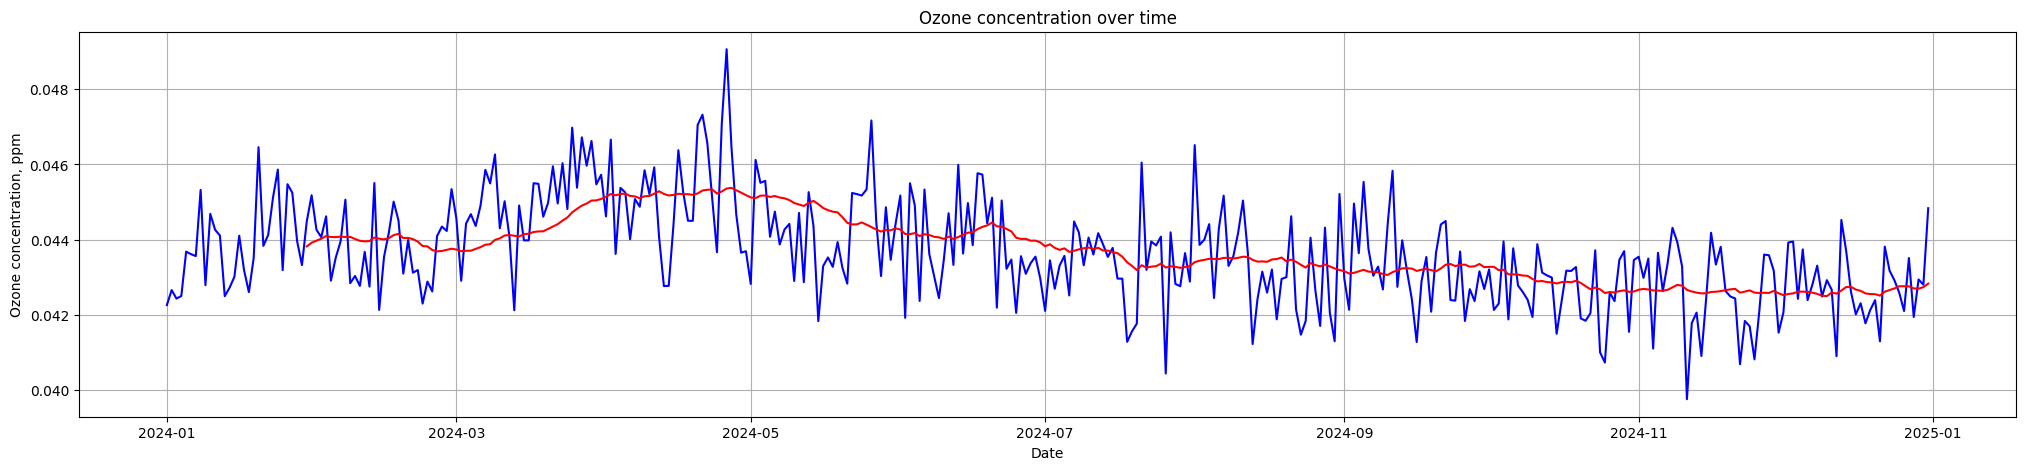

In [180]:
plt.figure(figsize=(25,5))
plt.plot(daily_avg, label='Average daily max 8-hour ozone concentration', color='blue')
plt.plot(rolling_avg, label='Average 30-day max 8-hour ozone concentration', color='red')
plt.title('Ozone concentration over time')
plt.ylabel('Ozone concentration, ppm')
plt.xlabel('Date')
plt.grid(True)
plt.show()

### Average ozone concentration by county
Now let's take a look at the average ozone concentration by county. I'd also like to visualise how bad the ozone concentration level is. After a quick Google search, this is what I found:

__Good__: <0.054 ppm

__Moderate__: 0.055-0.070 ppm

__Unhealthy for sensitive individuals__: 0.071-0.085 ppm

__Unhealthy__: 0.086-0.105 ppm 

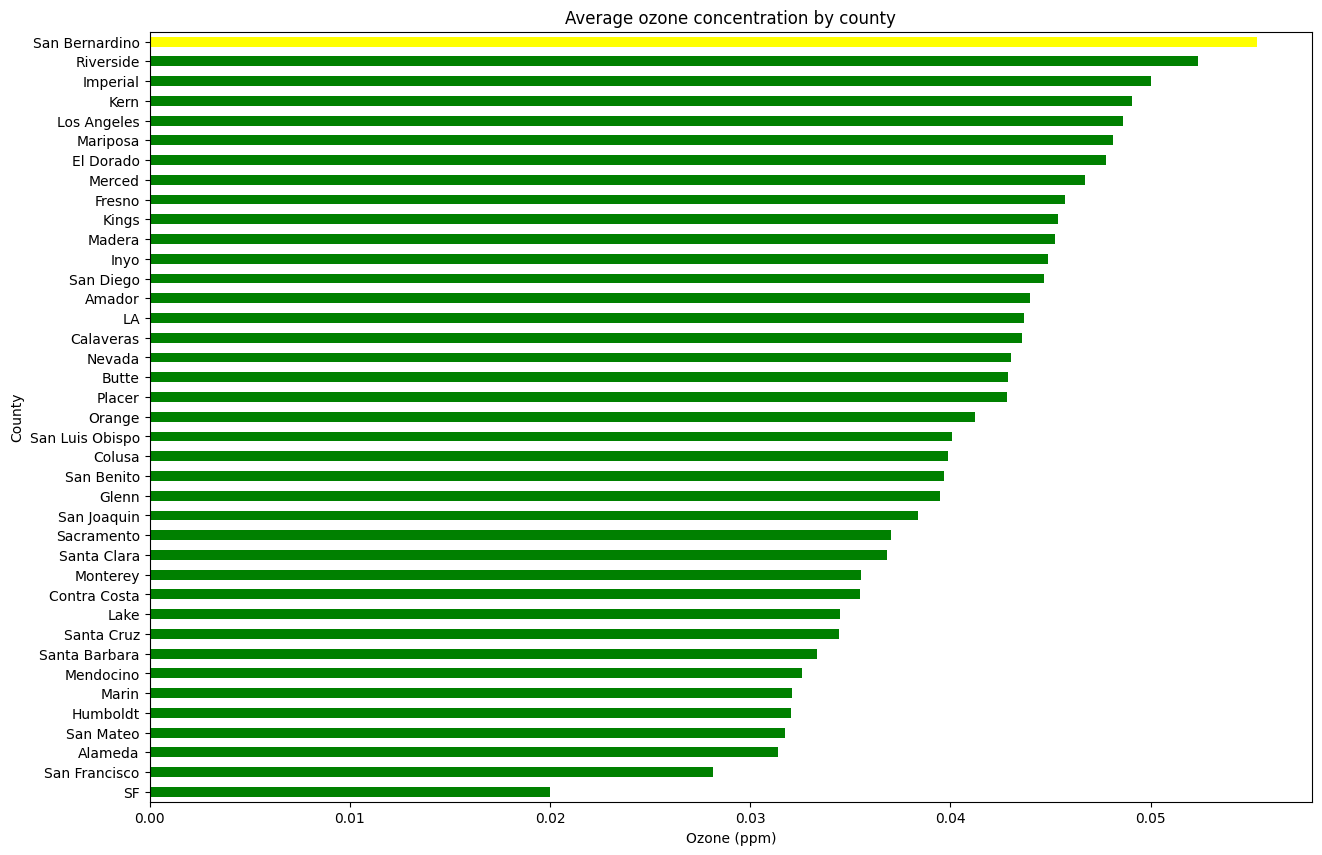

In [202]:
good_threshold = 0.054
moderate_threshold = 0.07
bad_threshold = 0.085
very_bad_threshold = 0.105

county_avg = ozone_q1.groupby('County')['Daily Max 8-hour Ozone Concentration'].mean().sort_values()

colors_thresholds = [
    'green' if ozone_concentration < good_threshold else
    'yellow' if ozone_concentration < moderate_threshold else
    'orange' if ozone_concentration < bad_threshold else
    'red'
    for ozone_concentration in county_avg
]

county_avg.plot(kind='barh', figsize=(15, 10), color=colors_thresholds, title='Average ozone concentration by county')
plt.xlabel('Ozone (ppm)')
plt.show()

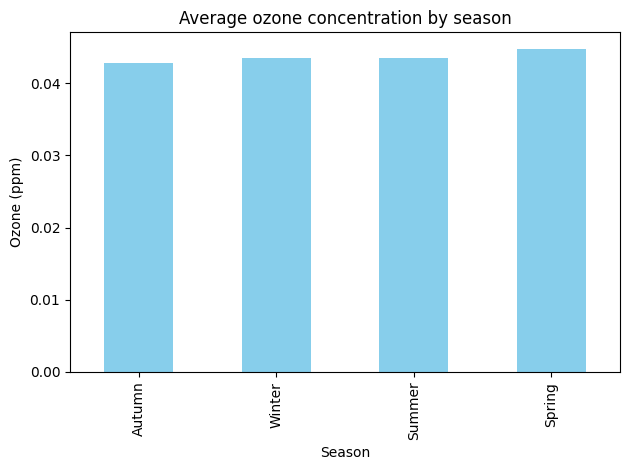

In [203]:
seasonal_avg = ozone_df.groupby('Season')['Daily Max 8-hour Ozone Concentration'].mean().sort_values()
seasonal_avg.plot(kind='bar', color='skyblue', title='Average ozone concentration by season')
plt.ylabel('Ozone (ppm)')
plt.tight_layout()
plt.show()


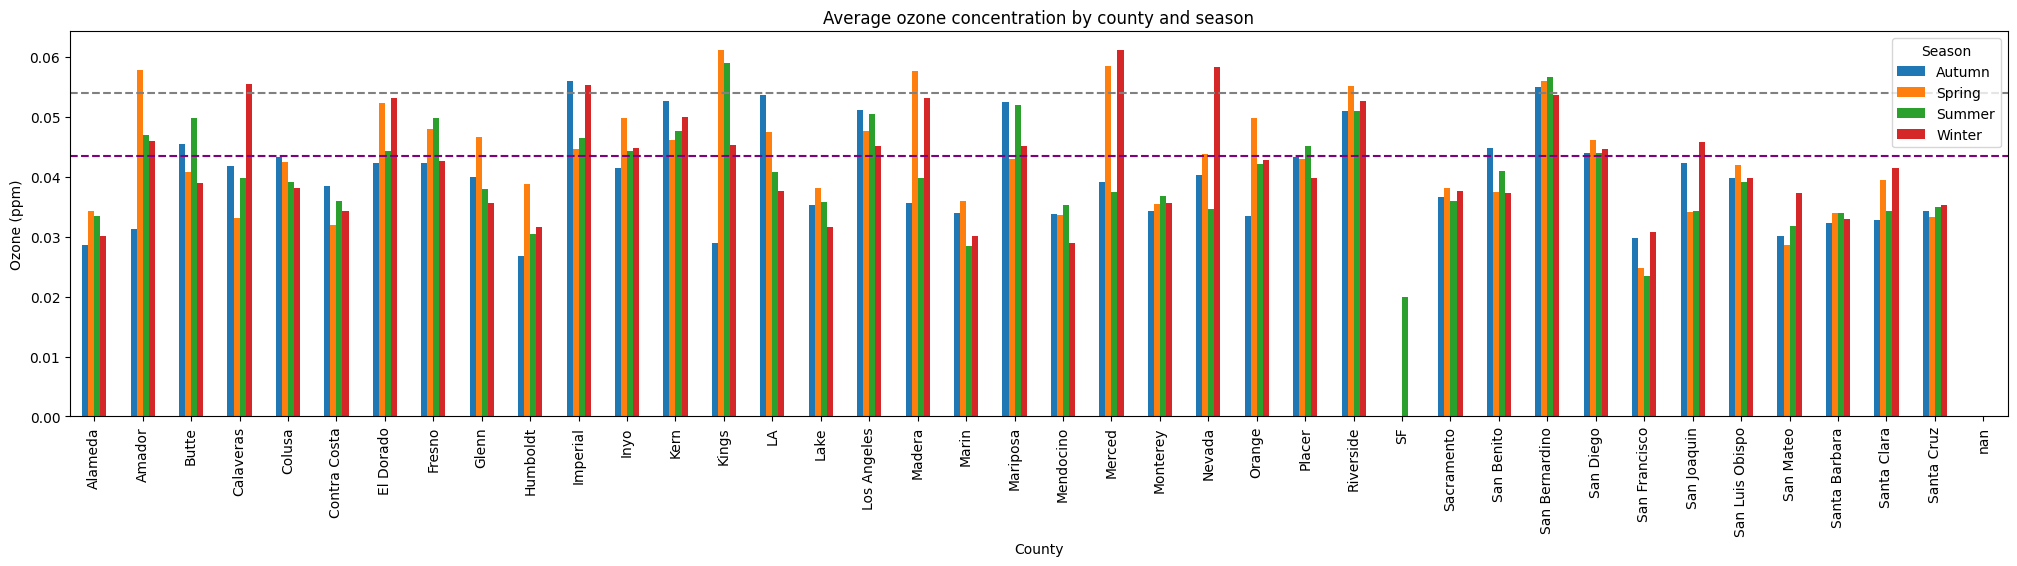

In [217]:
seasonal_county_avg = ozone_df.groupby(['County', 'Season'])['Daily Max 8-hour Ozone Concentration'].mean().unstack()
all_time_avg = ozone_df['Daily Max 8-hour Ozone Concentration'].mean()

seasonal_county_avg.plot(kind='bar', figsize=(25,5))

plt.axhline(all_time_avg, color='purple', linestyle='--', label=f'All-time average: {all_time_avg:.2f}')
plt.axhline(good_threshold, color='grey', linestyle='--', label=f'Healthy level threshold: {good_threshold:.2f}')

plt.title('Average ozone concentration by county and season')
plt.xlabel('County')
plt.ylabel('Ozone (ppm)')
plt.show()

In [218]:
weekday_ozone = ozone_df.groupby('Weekday')['Daily Max 8-hour Ozone Concentration'].mean()
print(weekday_ozone)


Weekday
False    0.043731
True     0.043606
Name: Daily Max 8-hour Ozone Concentration, dtype: float64


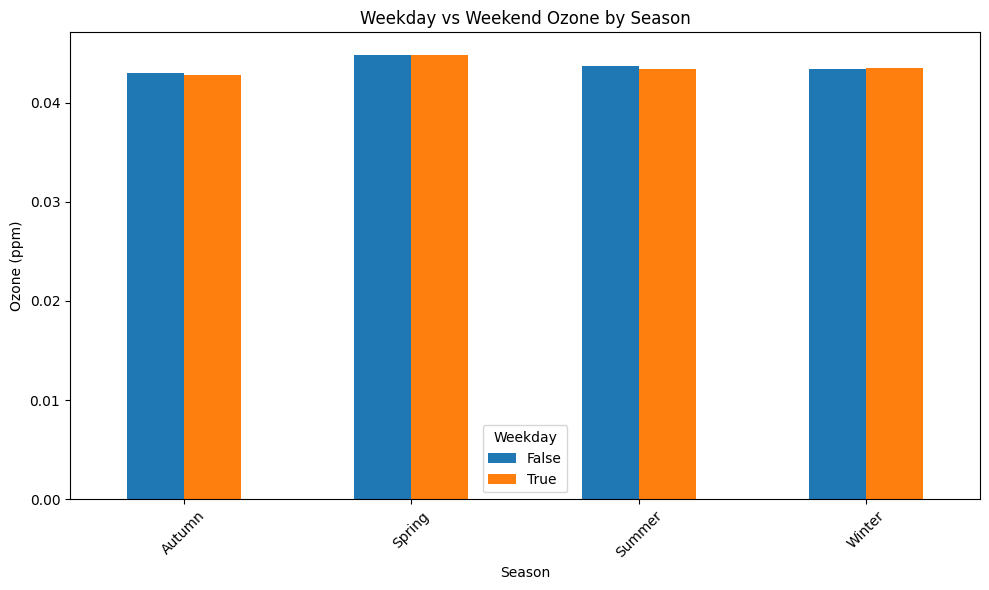

In [ ]:
# By weekday and season
weekday_season = ozone_df.groupby(['Season', 'Weekday'])['Daily Max 8-hour Ozone Concentration'].mean().unstack()
weekday_season.plot(kind='bar', figsize=(10, 6))
plt.title('Weekday vs weekend ozone concentration by season')
plt.ylabel('Ozone (ppm)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

